Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 

In [35]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv')
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
df = df.drop(['PetalLengthCm', 'PetalWidthCm','Id'], axis = 1)

In [4]:
for i in range(df.shape[0]):
    if df['Species'][i] == 'Iris-setosa':
        df['Species'][i] = 0
    elif df['Species'][i] == 'Iris-versicolor':
        df['Species'][i] = 1
    elif df['Species'][i] == 'Iris-virginica':
        df['Species'][i] = 2

C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\3103489994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'][i] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\3103489994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'][i] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\3103489994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'][i] = 2


In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Species'], axis = 1), df['Species'],
                                                    test_size = 0.2, random_state=42)

In [28]:
from sklearn import svm

In [9]:
model = SVC(kernel = 'linear')

In [10]:
model.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'

In [14]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Species, Length: 120, dtype: object

In [17]:
from sklearn import datasets
digits = datasets.load_digits()

# flatten the images
n = len(digits.images)
data = digits.images.reshape((n, -1))

In [25]:
len(digits.images)

1797

In [21]:
import matplotlib.pyplot as plt

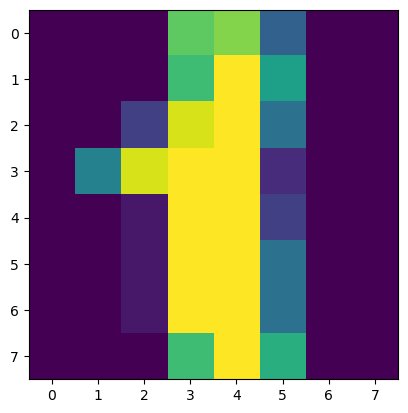

In [23]:
plt.imshow(digits.images[1])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3)

In [29]:
model = svm.SVC(gamma=0.001)
model.fit(X_train,y_train)

SVC(gamma=0.001)

In [31]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy achieved through SVM is ", round(accuracy*100,2), "%")

The accuracy achieved through SVM is  98.7 %


In [36]:
#Use Precision, Recall, F-1 Score, and accuracy on test data to evaluate the performance of the SVM model.

conMat = np.zeros([10,10])
for i,j in zip(y_test,y_pred):
    conMat[i,j] += 1
    
precision = np.zeros(10)
for i in range(10):
    precision[i] = conMat[i,i]/(sum(conMat[:,i]))

recall = np.zeros(10)
for i in range(10):
    recall[i] = conMat[i,i]/(sum(conMat[i,:]))

f1 = np.zeros(10)
for i in range(10):
    f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

accuracy = (np.trace(conMat))/(np.sum(conMat))